<img src="../images/Cyclistic-banner.png" alt="Banner do Projeto" style="width: 100%">

## **Cenário**

Você é um analista de dados júnior que trabalha na equipe de analistas de marketing da Cyclistic, uma empresa de compartilhamento de bicicletas em Chicago. O diretor de marketing acredita que o sucesso futuro da empresa depende da maximização do número de planos anuais contratados. Portanto, sua equipe quer entender como os ciclistas casuais e os membros anuais usam as bicicletas da Cyclistic de forma diferente. A partir desses insights, sua equipe criará uma nova estratégia de marketing para converter passageiros casuais em membros anuais. Mas, primeiro, os executivos da Cyclistic devem aprovar suas recomendações que, portanto, devem ser apoiadas com insights de dados convincentes e visualizações de dados profissionais.

## **Personagens e Equipe**

- **Cyclistic:** Um programa de compartilhamento de bicicletas que conta com mais de 5.800 bicicletas e 600 estações de compartilhamento. A Cyclistic se diferencia por também oferecer bicicletas reclináveis, triciclos manuais e bicicletas de carga, tornando o compartilhamento de bicicletas mais inclusivo para pessoas com deficiência e ciclistas que não podem usar uma bicicleta padrão de duas rodas. A maioria dos ciclistas opta por bicicletas tradicionais; cerca de 8% dos motociclistas usam as opções assistivas. Os usuários da Cyclistic são mais propensos a pedalar por lazer, mas cerca de 30% utilizam as bicicletas para se deslocarem ao trabalho diariamente.
- **Lily Moreno:** Diretora de marketing e sua gerente. Lily é responsável pelo desenvolvimento de campanhas e iniciativas de promoção do programa de compartilhamento de bicicletas. As campanhas podem incluir e-mail, mídias sociais e outros canais.
- **Equipe de análise de marketing da Cyclistic:** Uma equipe de analistas de dados responsáveis por coletar, analisar e relatar dados que ajudam a orientar a estratégia de marketing da Cyclistic. Você se juntou a essa equipe há seis meses e tem estado ocupado aprendendo sobre a missão e os objetivos de negócios da Cyclistic – e como você, como analista de dados júnior, também pode ajudar a Cyclistic a alcançá-los.
- **Equipe executiva da Cyclistic:** A equipe executiva notoriamente detalhista decidirá se aprova o programa de marketing recomendado. 


## **Sobre a Empresa**

Em 2016, a Cyclistic lançou uma oferta bem-sucedida de compartilhamento de bicicletas. Desde então, o programa cresceu para uma frota de 5.824 bicicletas com rastreamento geográfico e bloqueio dentro de uma rede de 692 estações em Chicago. As bicicletas podem ser desbloqueadas em uma estação e devolvidas em qualquer outra estação do sistema a qualquer momento.

Até agora, a estratégia de marketing da Cyclistic baseava-se na conscientização geral e no apelo a amplos segmentos de consumidores. Uma abordagem que ajudou a tornar essas coisas possíveis foi a flexibilidade de seus planos de preços: passes de viagem única, passes de dia inteiro e planos anuais. Os clientes que adquirem passes de viagem única ou de dia inteiro são chamados de passageiros casuais. Os clientes que adquirem planos anuais são membros Cyclistic.

Os analistas financeiros da Cyclistic concluíram que os membros anuais são muito mais lucrativos do que os passageiros casuais. Embora a flexibilidade de preços ajude a Cyclistic a atrair mais clientes, Lily Moreno acredita que maximizar o número de membros anuais será a chave para o crescimento futuro. Em vez de criar uma campanha de marketing voltada para novos clientes, ela acredita que há uma boa chance de converter passageiros casuais em membros. Ela observa que os ciclistas casuais já estão cientes do programa Cyclistic e escolheram a Cyclistic para suas necessidades de mobilidade.

A Lily estabeleceu um objetivo claro: criar estratégias de marketing destinadas a converter passageiros casuais em membros anuais. Para fazer isso, no entanto, a equipe de analistas de marketing precisa entender melhor como os membros anuais e os passageiros casuais diferem, por que os passageiros casuais iriam querer adquirir um plano e como a mídia digital poderia afetar suas táticas de marketing. A Lily e sua equipe estão interessados em analisar os dados históricos de trajetos de bicicleta da Cyclistic para identificar tendências.


## **Perguntas a serem respondidas**

1. Como os membros anuais e os ciclistas casuais usam as bicicletas da Cyclistic de forma diferente?
2. Por que os passageiros casuais iriam adquirir planos anuais da Cyclistic?
3. Como a Cyclistic pode usar a mídia digital para influenciar os passageiros casuais a se tornarem membros?

## **Importação das Bibliotecas**

In [1]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from geopy.distance import geodesic
import requests

## **Coleta dos Dados**

Usaremos os dados históricos de trajetos da Cyclistic para analisar e identificar tendências (Observação: os conjuntos de dados têm um nome diferente porque a Cyclistic é uma empresa fictícia. Para os propósitos deste estudo de caso, os conjuntos de dados são adequados e permitem que você responda às perguntas de negócios. Os dados foram disponibilizados pela Motivate International Inc. sob esta licença). Esses são dados públicos que podem ser usados para explorar como os diferentes tipos de clientes estão utilizando as bicicletas da Cyclistic. Entretanto, observe que problemas de privacidade de dados o proíbem de usar as informações de identificação pessoal dos passageiros. Ou seja, você não poderá conectar compras de passes a números de cartão de crédito para determinar se passageiros casuais moram na área de serviço da Cyclistic ou se compraram vários passes únicos.

Os dados para este projeto estão disponibilizados na página https://divvy-tripdata.s3.amazonaws.com/index.html

In [2]:
# Fazer o Download dos arquivos e salvar na pasta zip

# Lista dos nomes dos arquivos
arquivos = [f"{ano}{mes:02d}-divvy-tripdata.zip" for ano in range(2023, 2025) for mes in range(1, 13) if ano == 2023 and mes >= 8 or ano == 2024 and mes <= 7]

# URL
url_base = "https://divvy-tripdata.s3.amazonaws.com/"

# Diretório onde os arquivos serão salvos
diretorio_destino_relativo = 'data/raw/zip'

# caminho absoluto para o diretório raiz do projeto
raiz_projeto = Path.cwd().parent 

# Constrói o caminho para o diretório de destino
diretorio_destino = raiz_projeto / diretorio_destino_relativo

# Loop para baixar cada arquivo
for arquivo in arquivos:
    url = url_base + arquivo
    resposta = requests.get(url)

    # Verifica se o download
    if resposta.status_code == 200:
        # Constrói o caminho completo
        caminho_completo = os.path.join(diretorio_destino, arquivo)
        with open(caminho_completo, 'wb') as f:
            f.write(resposta.content)
        print(f"Arquivo {arquivo} baixado com sucesso em {caminho_completo}!")
    else:
        print(f"Erro ao baixar o arquivo {arquivo}. Código de status: {resposta.status_code}")

Arquivo 202308-divvy-tripdata.zip baixado com sucesso em c:\Users\marce\OneDrive\Área de Trabalho\Repositorio_GITHUB\Cyclistic\data\raw\zip\202308-divvy-tripdata.zip!
Arquivo 202309-divvy-tripdata.zip baixado com sucesso em c:\Users\marce\OneDrive\Área de Trabalho\Repositorio_GITHUB\Cyclistic\data\raw\zip\202309-divvy-tripdata.zip!
Arquivo 202310-divvy-tripdata.zip baixado com sucesso em c:\Users\marce\OneDrive\Área de Trabalho\Repositorio_GITHUB\Cyclistic\data\raw\zip\202310-divvy-tripdata.zip!
Arquivo 202311-divvy-tripdata.zip baixado com sucesso em c:\Users\marce\OneDrive\Área de Trabalho\Repositorio_GITHUB\Cyclistic\data\raw\zip\202311-divvy-tripdata.zip!
Arquivo 202312-divvy-tripdata.zip baixado com sucesso em c:\Users\marce\OneDrive\Área de Trabalho\Repositorio_GITHUB\Cyclistic\data\raw\zip\202312-divvy-tripdata.zip!
Arquivo 202401-divvy-tripdata.zip baixado com sucesso em c:\Users\marce\OneDrive\Área de Trabalho\Repositorio_GITHUB\Cyclistic\data\raw\zip\202401-divvy-tripdata.zip

In [28]:
caminho_completo

'c:\\Users\\marce\\OneDrive\\Área de Trabalho\\Repositorio_GITHUB\\Cyclistic\\data\\raw\\zip\\202407-divvy-tripdata.zip'

In [3]:
# Descompactar e gravar 
import zipfile

# Diretório onde os arquivos serão extraídos
diretorio_extracao_relativo = 'data/raw/csv'

# Obtém o caminho absoluto para o diretório raiz do projeto
raiz_projeto = Path.cwd().parent

# Constrói o caminho completo
diretorio_extracao = raiz_projeto / diretorio_extracao_relativo

# Cria o diretório de extração se ele não existir
os.makedirs(diretorio_extracao, exist_ok=True)

# Loop para extrair cada arquivo zip
for arquivo in arquivos:
    # Constrói o caminho completo para o arquivo zip
    caminho_zip = os.path.join(diretorio_destino, arquivo)

    # Extrai o arquivo zip
    with zipfile.ZipFile(caminho_zip, 'r') as zip_ref:
        zip_ref.extractall(diretorio_extracao)

    print(f"Arquivo {arquivo} extraído com sucesso em {diretorio_extracao}!")

Arquivo 202308-divvy-tripdata.zip extraído com sucesso em c:\Users\marce\OneDrive\Área de Trabalho\Repositorio_GITHUB\Cyclistic\data\raw\csv!
Arquivo 202309-divvy-tripdata.zip extraído com sucesso em c:\Users\marce\OneDrive\Área de Trabalho\Repositorio_GITHUB\Cyclistic\data\raw\csv!
Arquivo 202310-divvy-tripdata.zip extraído com sucesso em c:\Users\marce\OneDrive\Área de Trabalho\Repositorio_GITHUB\Cyclistic\data\raw\csv!
Arquivo 202311-divvy-tripdata.zip extraído com sucesso em c:\Users\marce\OneDrive\Área de Trabalho\Repositorio_GITHUB\Cyclistic\data\raw\csv!
Arquivo 202312-divvy-tripdata.zip extraído com sucesso em c:\Users\marce\OneDrive\Área de Trabalho\Repositorio_GITHUB\Cyclistic\data\raw\csv!
Arquivo 202401-divvy-tripdata.zip extraído com sucesso em c:\Users\marce\OneDrive\Área de Trabalho\Repositorio_GITHUB\Cyclistic\data\raw\csv!
Arquivo 202402-divvy-tripdata.zip extraído com sucesso em c:\Users\marce\OneDrive\Área de Trabalho\Repositorio_GITHUB\Cyclistic\data\raw\csv!
Arquiv

## **Carregamento dos Dados**

In [4]:
# Diretório onde os arquivos serão extraídos (relativo à pasta raiz do projeto)
diretorio_extracao_relativo = 'data/raw/csv'

# Obtém o caminho absoluto para o diretório raiz do projeto
raiz_projeto = Path.cwd().parent

# Constrói o caminho completo para o diretório de extração
diretorio_extracao = raiz_projeto / diretorio_extracao_relativo

# Lista todos os arquivos CSV no diretório
arquivos_csv = [f for f in os.listdir(diretorio_extracao) if f.endswith('.csv')]

# Lê e concatena todos os arquivos CSV em um único DataFrame
df = pd.concat((pd.read_csv(os.path.join(diretorio_extracao, f)) for f in arquivos_csv), ignore_index=True)

print("Arquivos CSV concatenados com sucesso!")

Arquivos CSV concatenados com sucesso!


In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,903C30C2D810A53B,electric_bike,2023-08-19 15:41:53,2023-08-19 15:53:36,LaSalle St & Illinois St,13430,Clark St & Elm St,TA1307000039,41.890721,-87.631477,41.902973,-87.63128,member
1,F2FB18A98E110A2B,electric_bike,2023-08-18 15:30:18,2023-08-18 15:45:25,Clark St & Randolph St,TA1305000030,NaN,NaN,41.884511,-87.631550,41.930000,-87.64000,member
2,D0DEC7C94E4663DA,electric_bike,2023-08-30 16:15:08,2023-08-30 16:27:37,Clark St & Randolph St,TA1305000030,NaN,NaN,41.884981,-87.630793,41.910000,-87.63000,member
3,E0DDDC5F84747ED9,electric_bike,2023-08-30 16:24:07,2023-08-30 16:33:34,Wells St & Elm St,KA1504000135,NaN,NaN,41.903105,-87.634667,41.900000,-87.62000,member
4,7797A4874BA260CA,electric_bike,2023-08-22 15:59:44,2023-08-22 16:20:38,Clark St & Randolph St,TA1305000030,NaN,NaN,41.885548,-87.632019,41.890000,-87.68000,member


In [6]:
# Salvar o csv bruto
df.to_csv(f'{diretorio_extracao}/dataset_concatenado/dataset_bruto.csv')

## **Sobre os dados coletados**

- ride_id: Código identificador da viagem realizada
- rideable_type: Tipo de bicicleta
- started_at: Data/Hora Inicio da viagem
- ended_at: Data/hora final da viagem
- start_station_name: Nome da estação onde a bicicleta foi retirada
- start_station_id: ID da estação
- end_station_name: Nome da estação onde a bicicleta encerrou a viagem
- end_station_id: ID da estação onde encerrou a viagem
- start_lat: Latitude Inicial
- start_lng: Longitude Inicial
- end_lat: Latitude Final
- end_lng: Longitude Final
- member_casual: Tipo de usuário

In [7]:
# Visualizar o formato dos dados
formato = df.shape

print(f'Existem {formato[0]:,} registros(linhas) e {formato[1]} colunas/características')

Existem 5,715,693 registros(linhas) e 13 colunas/características


## **Pré-Processamento dos Dados**

In [8]:
# Verificando registros duplicados
df['ride_id'].duplicated().sum()

211

In [9]:
# Eliminar os registros duplicados
df.drop_duplicates(subset='ride_id', inplace=True)
df['ride_id'].duplicated().sum()

0

In [10]:
# Verificar dados ausentes
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    947002
start_station_id      947002
end_station_name      989396
end_station_id        989396
start_lat                  0
start_lng                  0
end_lat                 7716
end_lng                 7716
member_casual              0
dtype: int64

Existem muitos dados ausentes/nulos referentes as estações.

Abaixo vamos visualizar o impacto destes dados ausentes.

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    16.569066
start_station_id      16.569066
end_station_name      17.310806
end_station_id        17.310806
start_lat              0.000000
start_lng              0.000000
end_lat                0.135002
end_lng                0.135002
member_casual          0.000000
dtype: float64


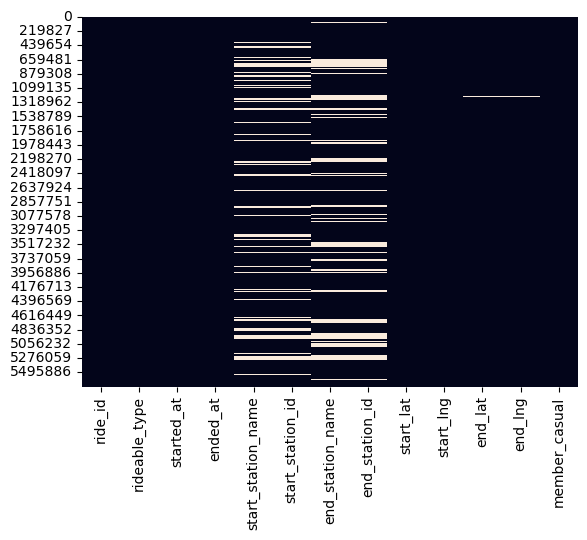

In [11]:
# Calcula a porcentagem de valores ausentes em cada coluna
percentual_ausentes = (df.isna().sum() / len(df)) * 100

# Exibe a porcentagem de valores ausentes
print(percentual_ausentes)

# Visualiza a distribuição dos valores ausentes em relação a outras variáveis
sns.heatmap(df.isna(), cbar=False)
plt.show()

O percentual de dados ausentes é elevado(podemos chegar a 30% dos dados). Mas também se alterarmos para "Desconhecido", podemos não ter com clareza quais estações são mais movimentadas.

Nossa decisão será descartá-los para utilizar dados nos quais temos certeza.

Mas primeiro vamos efetuar mais alguns tratamentos.

In [12]:
# Excluir dados ausentes no end_lat e end_lng
df.dropna(inplace=True)
df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [13]:
# Corrigindo as colunas de tempo

df['started_at'] = pd.to_datetime(df['started_at'], format='mixed', errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='mixed', errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4241200 entries, 0 to 5715692
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 453.0+ MB


Corrigido os dados ausentes, bem como o Dtype das colunas referente ao tempo, podemos criar outras duas caracteristicas que podem nos auxiliar na análise:

- Dia da semana: Pode ser relevante sabermos qual o dia da semana é mais utilizado
- Duração da viagem: Subtrair o ended_at e started_at para saber quanto tempo durou a viagem
- distancia_percorrida: Calcular a distância entre as coordenadas de inicio e fim.

In [14]:
# Weekday
df['weekday'] = df['started_at'].dt.weekday

map_dia_semana = {0:'Segunda', 1:'Terça', 2:'Quarta', 3:'Quinta', 4:'Sexta', 5:'Sábado', 6:'Domingo'}
df['weekday'] = df['weekday'].map(map_dia_semana)

# Definir a ordem correta dos dias da semana
dias_da_semana = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
df['weekday'] = pd.Categorical(df['weekday'], categories=dias_da_semana, ordered=True)

In [15]:
# Trip Duration em minutos
df['trip_duration'] = ((df['ended_at'] - df['started_at']).dt.total_seconds()/60).astype(int)

In [16]:
# Distance Traveled
df['distance_traveled'] = df.apply(
    lambda row: geodesic((row['start_lat'], row['start_lng']),
                        (row['end_lat'], row['end_lng'])).m,
    axis=1
)

In [17]:
# Exibir as estatísticas descritivas dos dados
df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,trip_duration,distance_traveled
count,4241200,4241200,4.241200e+06,4.241200e+06,4.241200e+06,4.241200e+06,4.241200e+06,4.241200e+06
mean,2024-01-31 03:08:51.601575936,2024-01-31 03:25:25.896141312,4.189994e+01,-8.764417e+01,4.190044e+01,-8.764444e+01,1.607990e+01,2.080759e+03
min,2023-08-01 00:00:07,2023-08-01 00:01:03,4.164850e+01,-8.784411e+01,0.000000e+00,-8.784396e+01,-5.400000e+01,0.000000e+00
25%,2023-09-29 14:28:45.249999872,2023-09-29 14:47:43.750000128,4.188033e+01,-8.765695e+01,4.188096e+01,-8.765766e+01,5.000000e+00,8.703707e+02
50%,2024-02-12 15:11:46,2024-02-12 15:24:27.500000,4.189492e+01,-8.764117e+01,4.189576e+01,-8.764119e+01,1.000000e+01,1.529696e+03
75%,2024-05-30 16:07:10.500000,2024-05-30 16:24:51.750000128,4.192599e+01,-8.762769e+01,4.192628e+01,-8.762769e+01,1.800000e+01,2.692760e+03
max,2024-07-31 23:54:26.535000,2024-07-31 23:59:56.738000,4.206487e+01,-8.752823e+01,4.206485e+01,0.000000e+00,6.891000e+03,9.814574e+06
std,NaN,NaN,4.344063e-02,2.539625e-02,4.812327e-02,4.962056e-02,3.642122e+01,5.120623e+03


In [18]:
# Eliminar os registros outliers

# Função para calcular os limites inferior e superior usando o método IQR
def calcular_limites_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    lim_inferior = Q1 - 1.5 * IQR
    lim_superior = Q3 + 1.5 * IQR
    return lim_inferior, lim_superior

# Calcular os limites para 'trip_duration'
lim_inferior_trip, lim_superior_trip = calcular_limites_iqr(df, 'trip_duration')

# Calcular os limites para 'distance_traveled'
lim_inferior_dist, lim_superior_dist = calcular_limites_iqr(df, 'distance_traveled')

# Filtrar o DataFrame para remover os outliers
df = df[
    (df['trip_duration'] >= lim_inferior_trip) & (df['trip_duration'] <= lim_superior_trip) &
    (df['distance_traveled'] >= lim_inferior_dist) & (df['distance_traveled'] <= lim_superior_dist)
]

# Exibir apenas os registros com 'trip_duration' maior que zero
df = df[df['trip_duration'] > 0]

# Verificar o resultado
df.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,trip_duration,distance_traveled
count,3707661,3707661,3.707661e+06,3.707661e+06,3.707661e+06,3.707661e+06,3.707661e+06,3.707661e+06
mean,2024-01-29 21:23:57.056498688,2024-01-29 21:35:02.896028416,4.189964e+01,-8.764454e+01,4.189991e+01,-8.764478e+01,1.060468e+01,1.773419e+03
min,2023-08-01 00:00:42,2023-08-01 00:02:51,4.164850e+01,-8.784411e+01,4.164850e+01,-8.784396e+01,1.000000e+00,0.000000e+00
25%,2023-09-29 23:43:06,2023-09-29 23:52:54,4.188032e+01,-8.765708e+01,4.188033e+01,-8.765814e+01,5.000000e+00,8.865146e+02
50%,2024-02-08 08:31:12,2024-02-08 08:40:36,4.189550e+01,-8.764170e+01,4.189576e+01,-8.764170e+01,9.000000e+00,1.472369e+03
75%,2024-05-28 20:16:55,2024-05-28 20:28:35,4.192560e+01,-8.762872e+01,4.192560e+01,-8.762932e+01,1.400000e+01,2.423753e+03
max,2024-07-31 23:54:26.535000,2024-07-31 23:59:56.738000,4.206487e+01,-8.752823e+01,4.206485e+01,-8.752823e+01,3.700000e+01,5.426309e+03
std,NaN,NaN,4.295750e-02,2.470944e-02,4.305570e-02,2.479323e-02,7.424914e+00,1.195118e+03


## **Análise Exploratória**

### **Distribuição de Viagens por Dia de Semana**

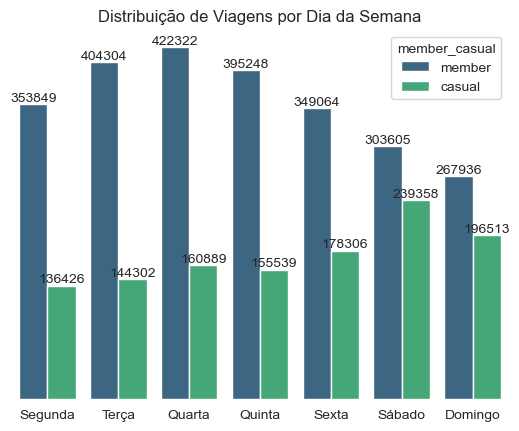

In [32]:
sns.set_style('white')
ax = sns.countplot(x='weekday', data=df, order=dias_da_semana, hue='member_casual', palette='viridis')
for i in range(2):
    plt.bar_label(ax.containers[i])
plt.title('Distribuição de Viagens por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Viagens')
sns.despine(left=True, bottom=True)
ax.set(yticklabels=[], xlabel=None, ylabel=None)

# Diretório onde os arquivos serão extraídos (relativo à pasta raiz do projeto)
diretorio_extracao_imagem = 'images'
# Obtém o caminho absoluto para o diretório raiz do projeto
raiz_projeto = Path.cwd().parent
# Constrói o caminho completo para o diretório 
diretorio_imagem = raiz_projeto / diretorio_extracao_imagem
# Salvar a figura
plt.savefig(f'{diretorio_imagem}\\distribuicao_viagens_dia_semana.png')

plt.show()

### **Duração das Viagens**

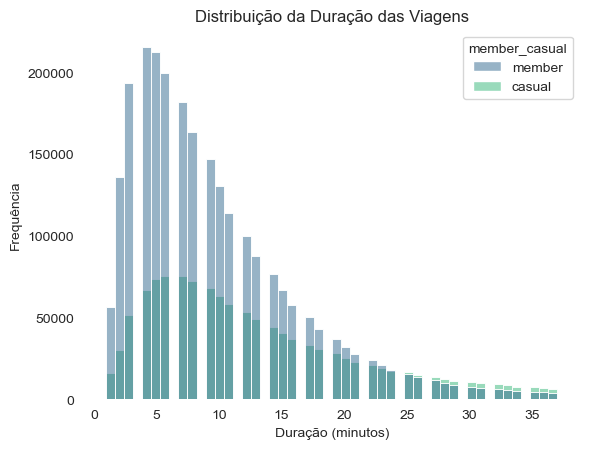

In [33]:
sns.histplot(data=df, x='trip_duration', bins=50, hue='member_casual', palette='viridis')
plt.title('Distribuição da Duração das Viagens')
plt.xlabel('Duração (minutos)')
plt.ylabel('Frequência')
sns.despine(left=True, bottom=True)
plt.savefig(f'{diretorio_imagem}\\distribuicao_duracao_viagens.png')
plt.show()

### **Distribuição de Viagens por dia de Semana**

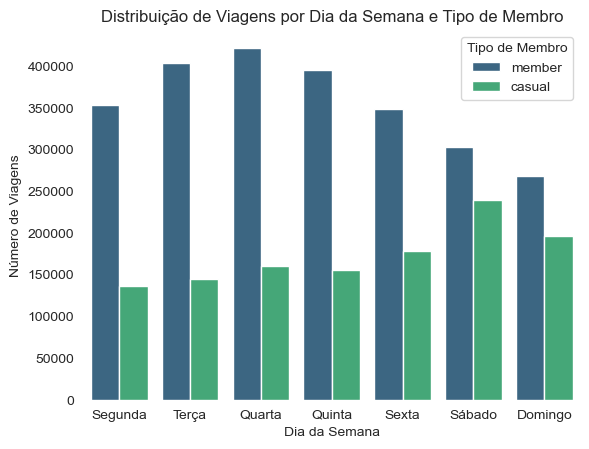

In [34]:
sns.countplot(x='weekday', hue='member_casual', data=df, order=dias_da_semana, palette='viridis')
plt.title('Distribuição de Viagens por Dia da Semana e Tipo de Membro')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Viagens')
plt.legend(title='Tipo de Membro')
sns.despine(left=True, bottom=True)
plt.savefig(f'{diretorio_imagem}\\distribuicao_viagens_dia_semana.png')
plt.show()

### **Distância Média Percorrida**

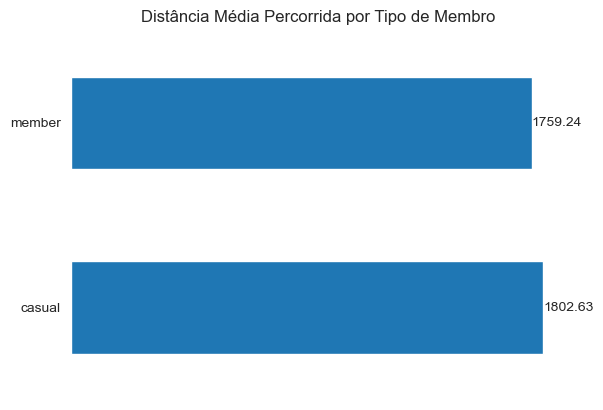

In [35]:
ax = df.groupby('member_casual')['distance_traveled'].mean().plot(kind='barh')
plt.bar_label(ax.containers[0])
plt.title('Distância Média Percorrida por Tipo de Membro')
plt.xlabel('Tipo de Membro')
plt.ylabel('Distância Média (metros)')
ax.set(xticklabels=[], xlabel=None, ylabel=None)
sns.despine(left=True, bottom=True)
plt.savefig(f'{diretorio_imagem}\\distancia_media_percorrida.png')
plt.show()

### **Estações Mais utilizadas**

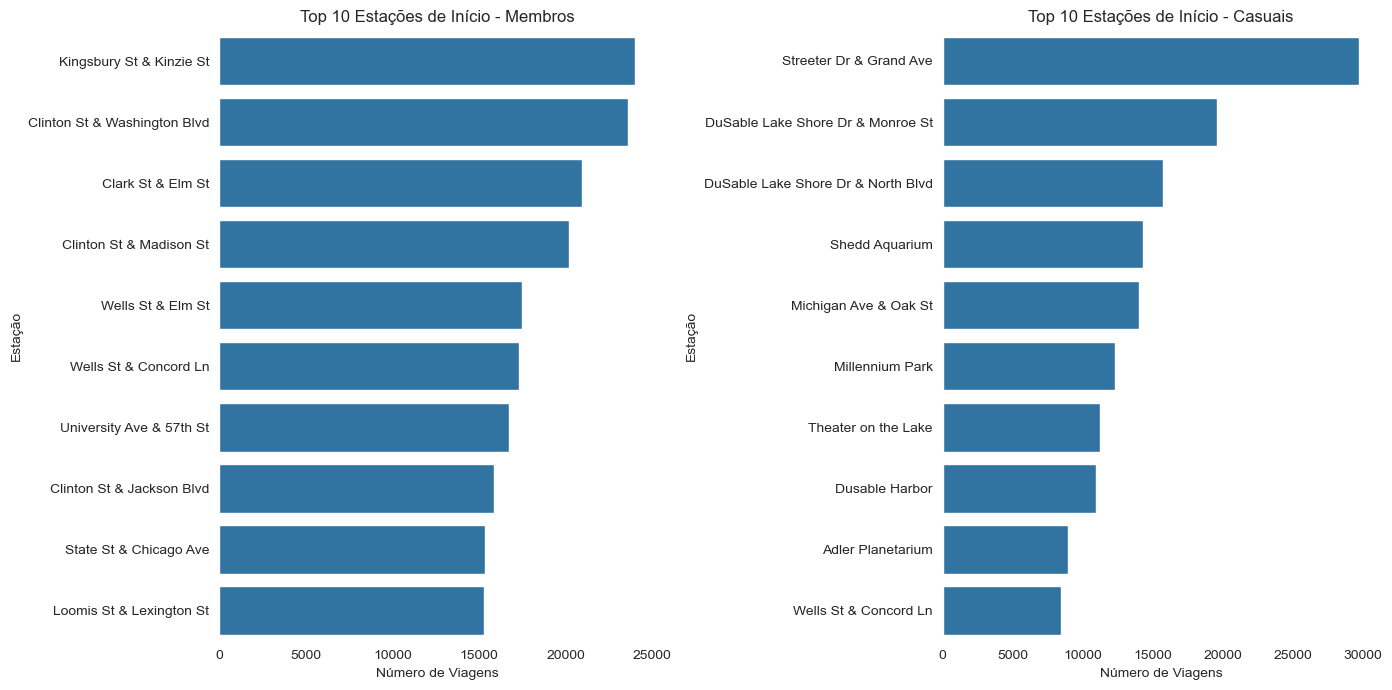

In [36]:
# Estações de Início
top_start_stations_member = df[df['member_casual'] == 'member']['start_station_name'].value_counts().head(10)
top_start_stations_casual = df[df['member_casual'] == 'casual']['start_station_name'].value_counts().head(10)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(y=top_start_stations_member.index, x=top_start_stations_member.values)
plt.title('Top 10 Estações de Início - Membros')
plt.xlabel('Número de Viagens')
plt.ylabel('Estação')
sns.despine(left=True, bottom=True)


plt.subplot(1, 2, 2)
sns.barplot(y=top_start_stations_casual.index, x=top_start_stations_casual.values)
plt.title('Top 10 Estações de Início - Casuais')
plt.xlabel('Número de Viagens')
plt.ylabel('Estação')

sns.despine(left=True, bottom=True)

plt.savefig(f'{diretorio_imagem}\\top_10_estacoes.png')
plt.tight_layout()
plt.show()

### **Viagens por Horário**

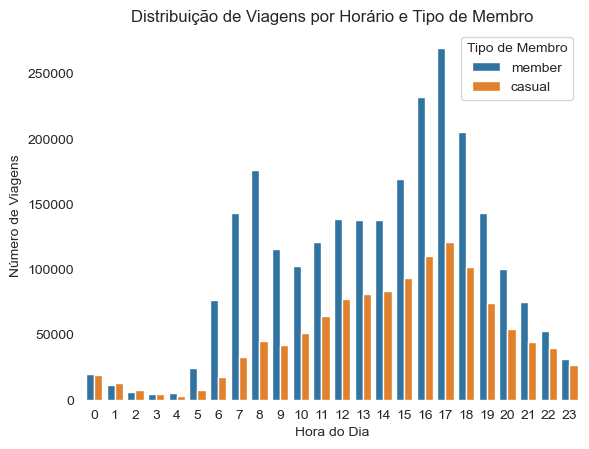

In [37]:
sns.set_style('white')
df['hour'] = df['started_at'].dt.hour
sns.countplot(x='hour', hue='member_casual', data=df)
plt.title('Distribuição de Viagens por Horário e Tipo de Membro')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Viagens')
plt.legend(title='Tipo de Membro')
sns.despine(left=True, bottom=True)
plt.savefig(f'{diretorio_imagem}\\distribuicao_viagens_por_horario.png')
plt.show()

## **Conclusões**

**1. Como os membros anuais e os ciclistas casuais usam as bicicletas da Cyclistic de forma diferente?**

A análise dos dados revelou diferenças significativas nos padrões de uso entre membros anuais e passageiros casuais:

- **Frequência de Uso:** Membros anuais tendem a usar as bicicletas de forma mais consistente ao longo da semana, especialmente durante os dias úteis, sugerindo que muitos utilizam as bicicletas para deslocamentos diários, como ir ao trabalho. Em contraste, passageiros casuais utilizam as bicicletas principalmente nos finais de semana e feriados, indicando um uso mais recreativo.
- **Duração das Viagens:** As viagens dos membros anuais são geralmente mais curtas em comparação com as dos passageiros casuais. Isso reforça a ideia de que membros anuais utilizam as bicicletas para deslocamentos rápidos e frequentes.
- **Horário de Uso:** Membros anuais tendem a usar as bicicletas durante os horários de pico (manhã e tarde), enquanto passageiros casuais têm um uso mais distribuído ao longo do dia.

**2. Por que os passageiros casuais iriam adquirir planos anuais da Cyclistic?**

Com base na análise, podemos identificar várias razões pelas quais passageiros casuais poderiam ser incentivados a adquirir planos anuais:

- **Economia:** Para passageiros casuais que utilizam as bicicletas com frequência, um plano anual pode ser mais econômico a longo prazo em comparação com a compra de passes diários ou de viagem única.
- **Comodidade:** Membros anuais têm a conveniência de não precisar se preocupar com a compra de passes a cada uso, tornando o processo de utilização das bicicletas mais simples e rápido.
- **Benefícios Adicionais:** A Cyclistic pode oferecer benefícios exclusivos para membros anuais, como descontos em eventos locais, acesso prioritário a novas bicicletas e estações, e suporte ao cliente dedicado.

**3. Como a Cyclistic pode usar a mídia digital para influenciar os passageiros casuais a se tornarem membros?**

A Cyclistic pode utilizar várias estratégias de mídia digital para converter passageiros casuais em membros anuais:

- **Campanhas de E-mail Marketing:** Enviar e-mails personalizados destacando os benefícios de se tornar um membro anual, incluindo comparações de custo e histórias de sucesso de outros membros.
- **Redes Sociais:** Utilizar plataformas de redes sociais para promover os benefícios dos planos anuais, compartilhar depoimentos de usuários e oferecer promoções exclusivas para seguidores.
- **Publicidade Online:** Investir em anúncios direcionados no Google e em redes sociais para alcançar passageiros casuais com mensagens personalizadas baseadas em seu comportamento de uso.
- **Aplicativo Móvel:** Utilizar notificações push no aplicativo da Cyclistic para lembrar os passageiros casuais dos benefícios de se tornarem membros anuais, especialmente após uma viagem recente.